We use Kera's flexible graph functional model to build a ConvNet that can differentiate between cats and dogs. The model is trained on 8000 images and tested on 2000 images of cats and dogs and achieves an accuracy of 80%

### Imports

In [63]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Preprocess the training dataset

In [14]:
## In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that
## the model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


### Preprocess the test dataset

In [18]:
#We only apply scaling. We do not augment the training set.
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


### Build the CNN using the Funtional API

In [67]:
def convolutional_model(input_shape, kernel_size1=(3, 3), strides1=(1, 1), kernel_size2=(2, 2), strides2=(1, 1)):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    """
    input_img = tf.keras.Input(shape=input_shape)

    # 1st Conv2D layer
    Z1 = tfl.Conv2D(filters=32, kernel_size=kernel_size1, strides=strides1, padding='same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')(A1)

    # 2nd Conv2D layer
    Z2 = tfl.Conv2D(filters=32, kernel_size=kernel_size2, strides=strides2, padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')(A2)

    # Flatten
    F = tfl.Flatten()(P2)

    # Dense Layer
    dense_1 = tfl.Dense(units=128, activation='relu')(F)

    # Output
    outputs = tfl.Dense(units=2, activation='softmax')(dense_1)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

### Compile the model using the 'adam' optimizer

In [69]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  #
                  metrics=['accuracy'])
conv_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,053,986 (4.02 MB)

 Trainable params: 1,053,986 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
history = conv_model.fit(x = training_set, epochs=25, validation_data=test_set)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 140ms/step - accuracy: 0.5240 - loss: 0.7304 - val_accuracy: 0.6345 - val_loss: 0.6480
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step - accuracy: 0.6481 - loss: 0.6243 - val_accuracy: 0.7115 - val_loss: 0.5635
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 134ms/step - accuracy: 0.7099 - loss: 0.5618 - val_accuracy: 0.7220 - val_loss: 0.5575
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 137ms/step - accuracy: 0.7173 - loss: 0.5532 - val_accuracy: 0.7395 - val_loss: 0.5254
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 131ms/step - accuracy: 0.7503 - loss: 0.5076 - val_accuracy: 0.7560 - val_loss: 0.5004
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 137ms/step - accuracy: 0.7577 - loss: 0.4949 - val_accuracy: 0.7465 - val_loss: 0.5398
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 133ms/step - accuracy: 0.7719 - loss: 0.4732 - val_accuracy: 0.7815 - val_loss: 0.4874
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 140ms/step - accuracy: 0.7810 - loss: 0

C:\Users\willi\AppData\Local\Temp\ipykernel_4404\1537416126.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\willi\AppData\Local\Temp\ipykernel_4404\1537416126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

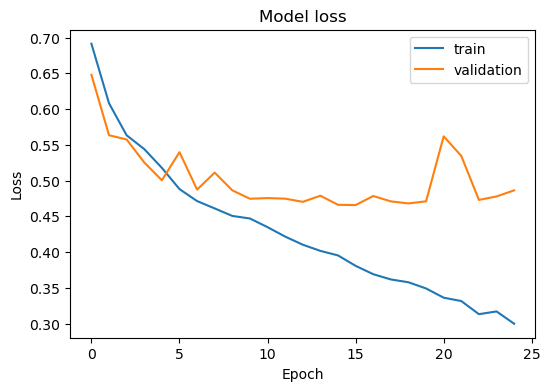

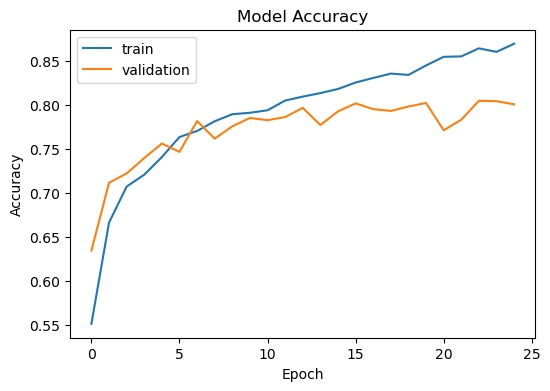

In [72]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')

In [78]:
# Save the entire model for future purposes
conv_model.save('my_functional_CNN.keras')

### Make predictions

In [93]:
#check indices of training set to map labels to classes
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [179]:
def load_and_preprocess_image(img_path, target_size=(64, 64)):
    img = image.load_img(img_path, target_size=target_size) #loaded image and resize to the specified target size
    img_array = image.img_to_array(img) #convert image to array
    img_array = np.expand_dims(img_array, axis=0) #adds extra dimension to correspond to batch in training set defn. (target_size=(64, 64), batch_size=32)
    img_array /= 255.0  #normalize the images

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.axis('off')  # Hide the axes
    plt.show()
    return img_array

def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)

    cat_prediction = prediction[0][0]
    dog_prediction = prediction[0][1]

    if cat_prediction > dog_prediction:
        print(f'Image: {img_path} is a cat')
    else:
        print(f'Image: {img_path} is a dog')

    print(f'Cat Prediction Probability: {cat_prediction:.3f}')
    print(f'Dog Prediction Probability: {dog_prediction:.3f}')

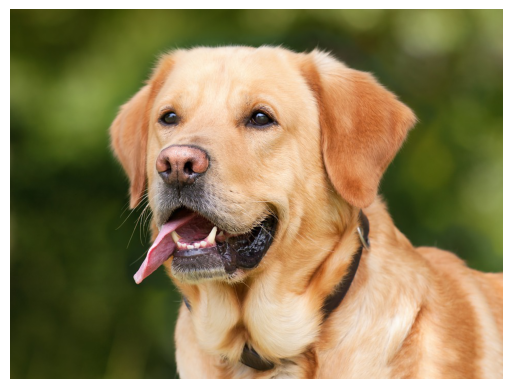

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image: dataset/single_prediction/cat_or_dog_1.jpg is a dog
Cat Prediction Probability: 0.003
Dog Prediction Probability: 0.997


In [181]:
predict_image(conv_model, 'dataset/single_prediction/cat_or_dog_1.jpg')

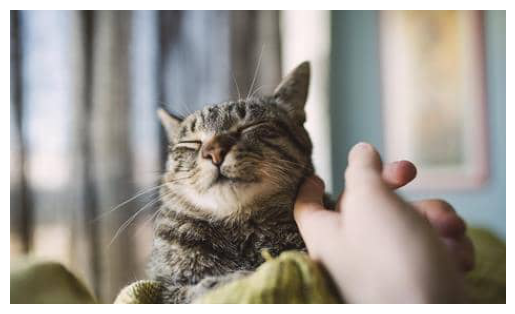

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: dataset/single_prediction/cat_or_dog_3.jpg is a cat
Cat Prediction Probability: 0.615
Dog Prediction Probability: 0.385


In [183]:
predict_image(conv_model, 'dataset/single_prediction/cat_or_dog_3.jpg')

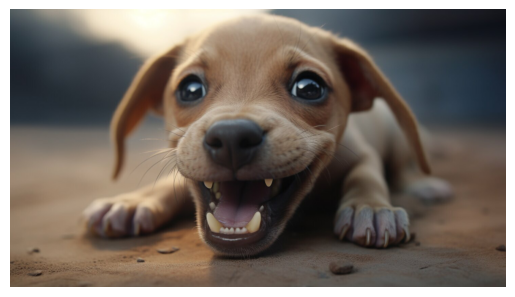

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: dataset/single_prediction/cat_or_dog_5.jpg is a dog
Cat Prediction Probability: 0.001
Dog Prediction Probability: 0.999


In [187]:
predict_image(conv_model, 'dataset/single_prediction/cat_or_dog_5.jpg')

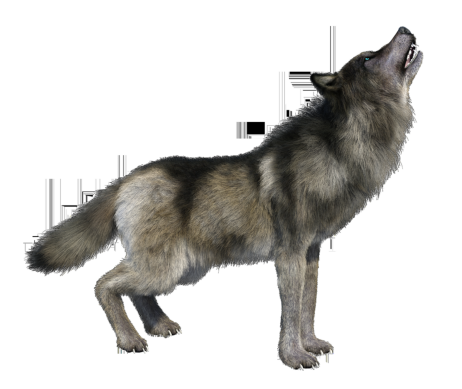

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: dataset/single_prediction/cat_or_dog_9.jpg is a cat
Cat Prediction Probability: 0.701
Dog Prediction Probability: 0.299


In [191]:
predict_image(conv_model, 'dataset/single_prediction/cat_or_dog_9.jpg')

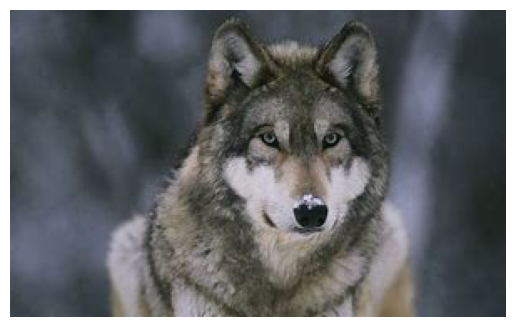

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Image: dataset/single_prediction/cat_or_dog_8.jpg is a dog
Cat Prediction Probability: 0.371
Dog Prediction Probability: 0.629


In [193]:
predict_image(conv_model, 'dataset/single_prediction/cat_or_dog_8.jpg')

The model does well, predicting dogs and cats with higher probabilities. However we see that the model is confused when shown new classes that are not part of the training class, which is to be expected.It predicts two different wolf pictures with varying probabilities as cat and dog. 